In [17]:
import numpy as np
from PIL import Image
import os

for img_id in range(1000,3338):
    mask_img_path = os.path.join("/scratch/network/mk8574/change_detection_challenge/baseline_dy/results/pred/20231117_031208_20231117_043451/mask",str(img_id)+".png")
    mask_img = Image.open(mask_img_path)
    x = np.array(mask_img)
    test_img_path=os.path.join("/scratch/network/mk8574/change_detection_challenge/data/test/x",str(img_id)+".png")
    test_img = Image.open(test_img_path)
    y = np.array(test_img)
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            if x[i][j]>0:
                y[i][j][x[i][j]-1]=256
    masked_img= Image.fromarray(y)
    masked_img.save("/scratch/network/mk8574/change_detection_challenge/baseline_dy/masked_img/"+str(img_id)+".png")
    print(img_id)

1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021


KeyboardInterrupt: 

In [21]:
lst = [0,0,0]
for img_id in range(1000,3338):
    mask_img_path = os.path.join("/scratch/network/mk8574/change_detection_challenge/baseline_dy/results/pred/20231117_031208_20231117_043451/mask",str(img_id)+".png")
    mask_img = Image.open(mask_img_path)
    x = np.array(mask_img)
    breaker=False
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j]>0:
                lst[x[i][j]-1]+=1
                breaker=True
                break
        if breaker:
            break
    if img_id%100==0:
        print(img_id,lst)
    
print("labels",lst)
                

1000 [0, 0, 1]
1100 [8, 3, 81]
1200 [12, 6, 166]
1300 [17, 11, 248]
1400 [22, 18, 326]
1500 [28, 23, 409]
1600 [39, 26, 489]
1700 [44, 31, 572]
1800 [53, 36, 653]
1900 [58, 40, 730]
2000 [66, 42, 813]
2100 [68, 42, 904]
2200 [74, 43, 989]
2300 [79, 46, 1074]
2400 [85, 50, 1159]
2500 [91, 52, 1246]
2600 [98, 54, 1328]
2700 [102, 60, 1415]
2800 [104, 61, 1504]
2900 [109, 62, 1590]
3000 [111, 67, 1678]
3100 [120, 70, 1761]
3200 [126, 74, 1843]
3300 [129, 78, 1928]
labels [131, 79, 1960]


In [9]:
import numpy as np
from PIL import Image
import os
img_id=1000
mask_img_path = os.path.join("/scratch/network/mk8574/change_detection_challenge/baseline_dy/results/pred/20231117_031208_20231117_043451/mask",str(img_id)+".png")
mask_img = Image.open(mask_img_path)
mask_img.show()

/usr/bin/xdg-open: line 862: www-browser: command not found
/usr/bin/xdg-open: line 862: links2: command not found
/usr/bin/xdg-open: line 862: elinks: command not found
/usr/bin/xdg-open: line 862: links: command not found
/usr/bin/xdg-open: line 862: lynx: command not found
/usr/bin/xdg-open: line 862: w3m: command not found
xdg-open: no method available for opening '/tmp/tmph18k4xw0.PNG'


In [7]:
import numpy as np
from PIL import Image
import os
from datetime import datetime
from tqdm import tqdm
import numpy as np
import random, os, sys, torch, cv2, warnings
from glob import glob
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

prj_dir = os.path.dirname('/scratch/network/mk8574/change_detection_challenge/baseline_dy/')

from modules.utils import load_yaml, save_yaml, get_logger
from modules.scalers import get_image_scaler
from modules.datasets import SegDataset
from models.utils import get_model

def colorize_mask(mask, colors):
    # Colorize the mask based on the provided colors
    # `colors` should be a dictionary mapping each class to a BGR color
    colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)

    for cls, color in colors.items():
        colored_mask[mask == cls] = color
    
    return colored_mask

def overlay_mask_on_image(image, mask, alpha=0.5):
    # Overlay the mask on the image
    overlay = cv2.addWeighted(image, alpha, mask, 1 - alpha, 0)
    return overlay

# Define colors for each class in BGR format
class_colors = {
    0: [0, 0, 0],        # Class 0: Black
    1: [255, 255, 0],      # Class 1: Yellow
    2: [0, 255, 255],      # Class 2: Lightblue
    3: [255, 0, 255],      # Class 3: Pink
}

/home/mk8574/.conda/envs/mk8574_3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
def predict_image(img_id = '2015_DMG_1LB_000066'):

 





    base_url = os.path.join("/scratch/network/mk8574/change_detection_challenge/swapdata/train")
    filename = img_id + ".png"
    orig_img = cv2.imread(os.path.join(base_url, 'x', filename), cv2.IMREAD_COLOR)
    orig_size = orig_img.shape




    

    gt_mask_path = os.path.join(base_url, 'y', filename) # Define `ground_truth_dir` appropriately
    gt_mask = cv2.imread(gt_mask_path, 0) # 0 for grayscale
    
    bk=False
    for i in range(len(gt_mask)):
        
        for j in range(len(gt_mask[0])):
            if gt_mask[i][j]!=0:
                bk=True
                break
        if bk:
            break
                  


    gt_img = overlay_mask_on_image(orig_img, colorize_mask(gt_mask, class_colors), alpha=0.5)
    plt.imshow(gt_img)
    # plt.imshow(gt_mask)
    plt.title('Ground Truth Segmentation')
    plt.axis('off')

    plt.show()

In [3]:
import os
swaplst = os.listdir("/scratch/network/mk8574/change_detection_challenge/swapdata/train/y")

  0%|          | 0/100 [00:00<?, ?it/s]

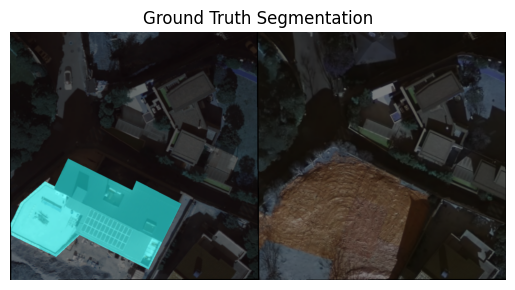

  1%|          | 1/100 [00:00<01:36,  1.03it/s]

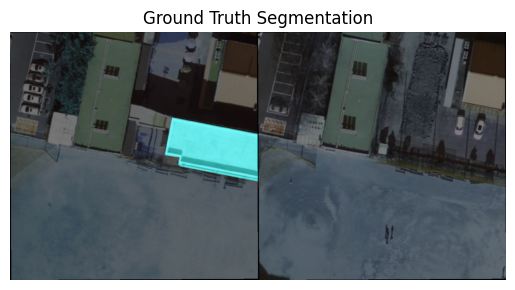

  2%|▏         | 2/100 [00:01<01:08,  1.44it/s]

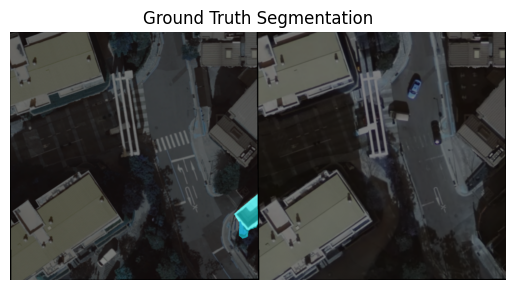

  3%|▎         | 3/100 [00:02<01:15,  1.28it/s]

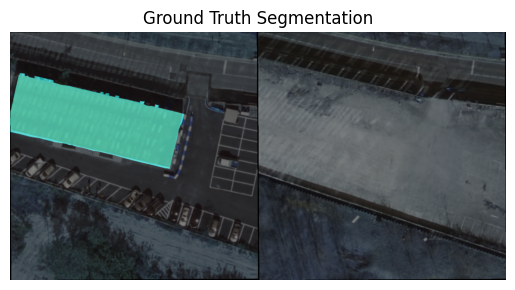

  4%|▍         | 4/100 [00:02<00:57,  1.66it/s]

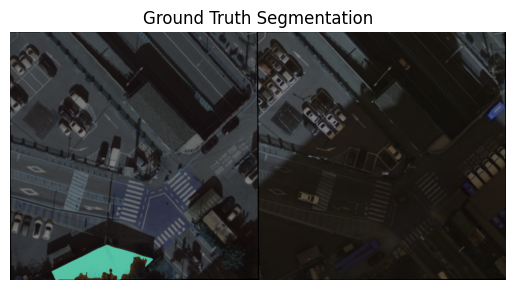

  5%|▌         | 5/100 [00:03<01:14,  1.27it/s]

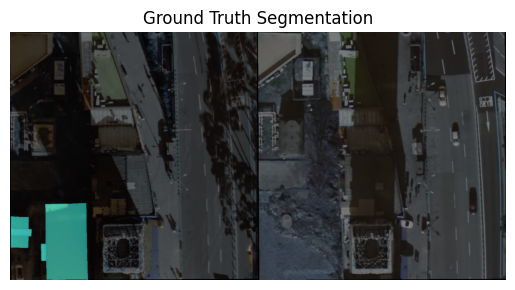

  6%|▌         | 6/100 [00:04<01:14,  1.25it/s]

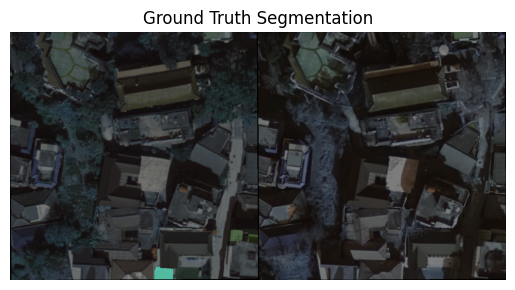

  7%|▋         | 7/100 [00:05<01:22,  1.13it/s]

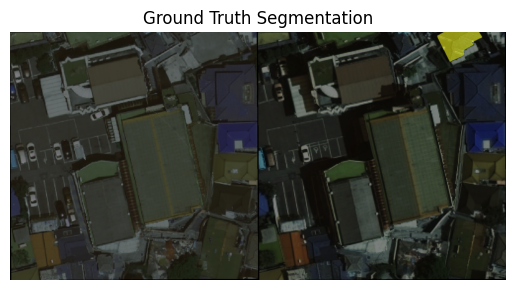

  8%|▊         | 8/100 [00:05<01:00,  1.52it/s]

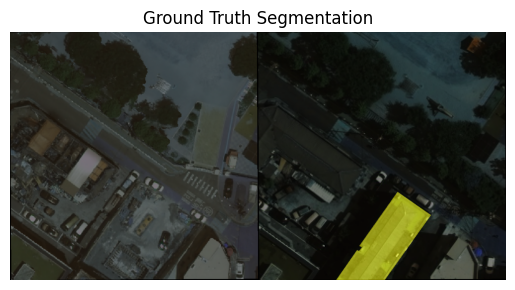

  9%|▉         | 9/100 [00:06<01:03,  1.44it/s]

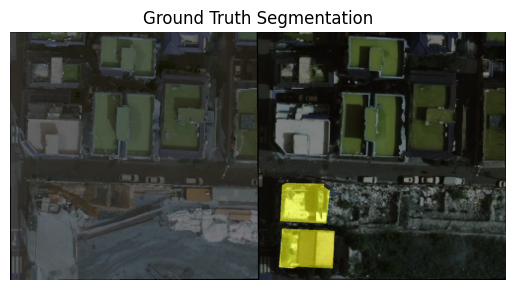

 10%|█         | 10/100 [00:07<01:03,  1.41it/s]

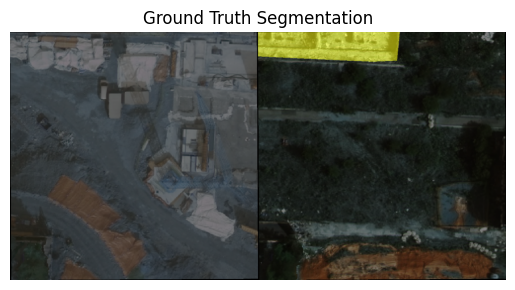

 11%|█         | 11/100 [00:07<00:48,  1.83it/s]

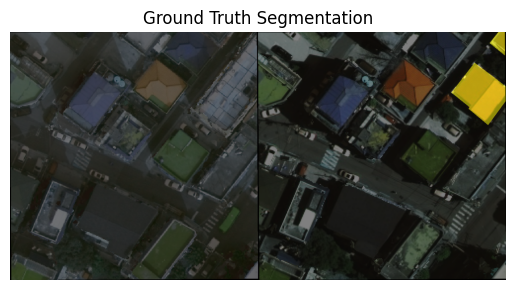

 12%|█▏        | 12/100 [00:07<00:38,  2.31it/s]

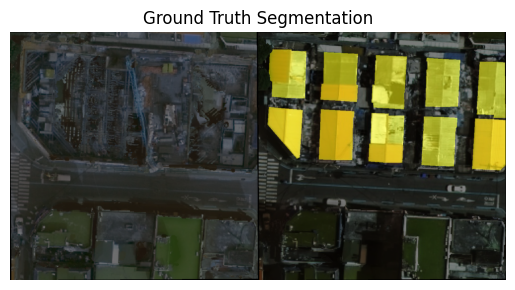

 13%|█▎        | 13/100 [00:07<00:32,  2.67it/s]

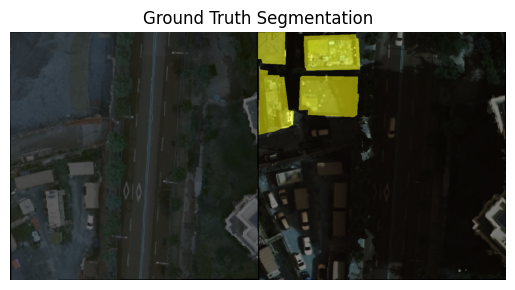

 14%|█▍        | 14/100 [00:08<00:26,  3.22it/s]

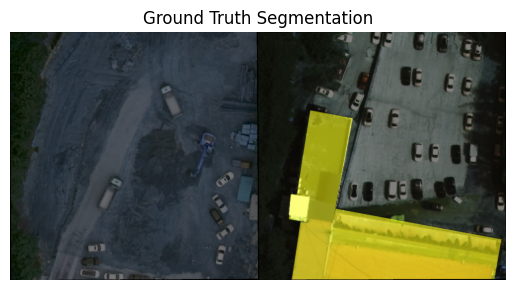

 15%|█▌        | 15/100 [00:08<00:30,  2.78it/s]

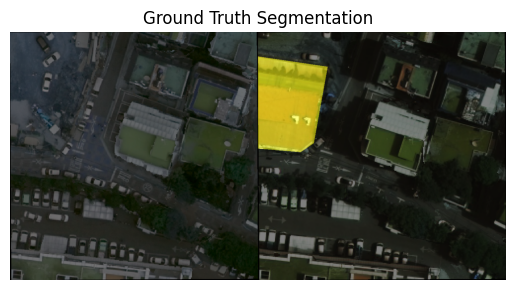

 16%|█▌        | 16/100 [00:08<00:27,  3.03it/s]

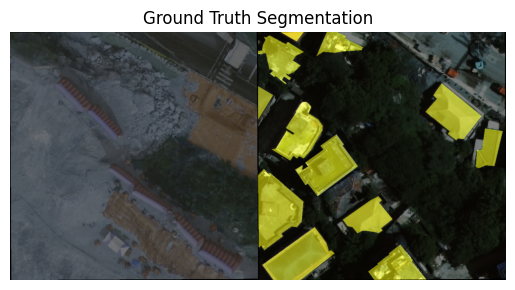

 17%|█▋        | 17/100 [00:09<00:23,  3.53it/s]

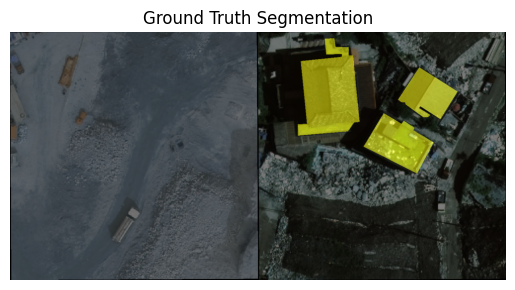

 18%|█▊        | 18/100 [00:09<00:21,  3.89it/s]

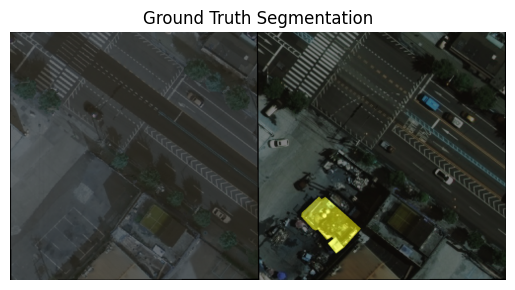

 19%|█▉        | 19/100 [00:10<00:33,  2.39it/s]

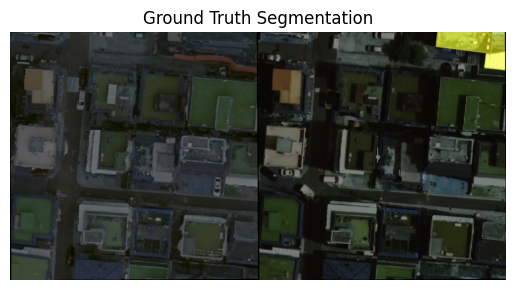

 20%|██        | 20/100 [00:10<00:27,  2.91it/s]

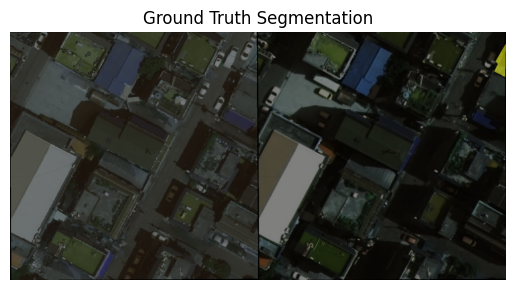

 21%|██        | 21/100 [00:10<00:24,  3.27it/s]

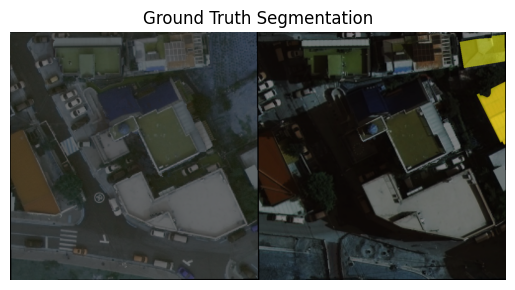

 22%|██▏       | 22/100 [00:10<00:20,  3.73it/s]

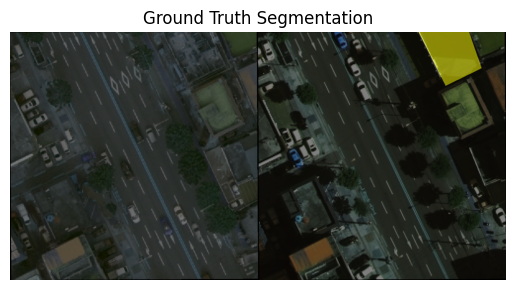

 23%|██▎       | 23/100 [00:11<00:37,  2.03it/s]


KeyboardInterrupt: 

In [12]:
from tqdm import tqdm
import cv2
for i in tqdm(swaplst[-100:]):

    if len(i)==len(swaplst[0]):

        predict_image(i[:-4])
        
        

    